# Data Preparation for classifying news categories with a Convolutional Neural Network (NEW)

In [11]:
import collections
import numpy as np
import pandas as pd
import re

from argparse import Namespace
from matplotlib import pyplot as plt

In [12]:
args = Namespace(
    raw_dataset_csv_1="../data/original/ag_news_train.csv",
    raw_dataset_csv_2="../data/original/ag_news_test.csv",
    train_proportion=0.7,
    val_proportion=0.15,
    test_proportion=0.15,
    output_munged_csv="../data/processed/News_Category_Dataset_with_splits.csv",
    seed=1337
)

In [13]:
# Read raw data
news_1 = pd.read_csv(args.raw_dataset_csv_1, header=0)
news_1 = news_1.sample(10000)
news_2 = pd.read_csv(args.raw_dataset_csv_2, header=0)
news = pd.merge(news_1, news_2, how="outer")
news["text"] = news["Title"] + ". " + news["Description"]
news.rename(columns={"Class Index":"category"}, inplace=True)
news.drop(axis=1, columns=["Title", "Description"], inplace=True)
news

,category,text
0,1,Militants Turn Over Keys to Najaf Shrine. NAJA...
1,4,"Study Eyes Salmonella, Typhoid, Monkeypox (AP)..."
2,3,The Local Scene-Some local talk about Sears-Km...
3,3,Martha Stewart asks to serve sentence now. Mil...
4,4,Bad Fit? Bad Color? Good Riddance. If you can ...
...,...,...
17595,1,Around the world. Ukrainian presidential candi...
17596,2,Void is filled with Clement. With the supply o...
17597,2,Martinez leaves bitter. Like Roger Clemens did...
17598,3,5 of arthritis patients in Singapore take Bext...


In [14]:
# Splitting train by category
# Create dict
label_dict = {1:"World", 2:"Sports", 3:"Business", 4:"Sci/Tech"}
by_label = collections.defaultdict(list)
for _, row in news.iterrows():
    row.category = label_dict[row.category]
    by_label[row.category].append(row.to_dict())

In [15]:
# Create split data
final_list = []
np.random.seed(args.seed)
for _, item_list in sorted(by_label.items()):
    np.random.shuffle(item_list)
    n = len(item_list)
    n_train = int(args.train_proportion*n)
    n_val = int(args.val_proportion*n)
    n_test = int(args.test_proportion*n)
    
    # Give data point a split attribute
    for item in item_list[:n_train]:
        item['split'] = 'train'
    for item in item_list[n_train:n_train+n_val]:
        item['split'] = 'val'
    for item in item_list[n_train+n_val:]:
        item['split'] = 'test'  
    
    # Add to final list
    final_list.extend(item_list)

In [16]:
# Write split data to file
final_news = pd.DataFrame(final_list)

In [17]:
final_news.split.value_counts()

train    12318
test      2644
val       2638
Name: split, dtype: int64

In [18]:
final_news.head()

,category,text,split
0,Business,Military Buoys Profit at Defense Firms. CHICA...,train
1,Business,"Kroger profit falls, warns on sales. Kroger (K...",train
2,Business,Longer-Dated Treasuries in Demand. NEW YORK (...,train
3,Business,"Merrill, Wachovia, others fined for late repor...",train
4,Business,Kmart names new CEO. Kmart yesterday hired a r...,train


In [19]:
# Write munged data to CSV
final_news.to_csv(args.output_munged_csv, index=False)

,category,text,split,length
0,Business,Military Buoys Profit at Defense Firms. CHICA...,train,435
1,Business,"Kroger profit falls, warns on sales. Kroger (K...",train,223
2,Business,Longer-Dated Treasuries in Demand. NEW YORK (...,train,222
3,Business,"Merrill, Wachovia, others fined for late repor...",train,263
4,Business,Kmart names new CEO. Kmart yesterday hired a r...,train,203
...,...,...,...,...
17595,World,Hostages plight clouds meeting of Blairs party...,test,302
17596,World,Turkey on Chirac-Schroeder agenda. President J...,test,261
17597,World,Terror Suspect Escapes From Bahrain Court. A t...,test,178
17598,World,"After Delays, Milosevic Opens Defense. THE HA...",test,296


<function matplotlib.pyplot.show(close=None, block=None)>

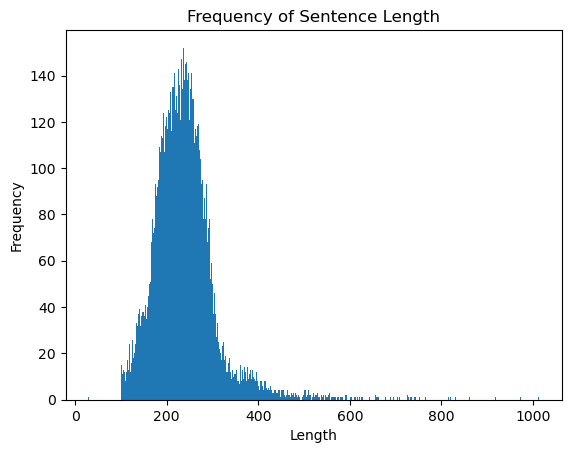

In [20]:
final_news['length'] = final_news['text'].apply(lambda x: len(x))
len_train = final_news.groupby('length').count()

sent_length = len_train.index.tolist()
sent_freq = len_train['text'].tolist()
display(final_news)
# 绘制句子长度及出现频数统计图
plt.bar(sent_length, sent_freq,2)
plt.title("Frequency of Sentence Length")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show